<a href="https://colab.research.google.com/github/Carolina-Silva/algoritmoLogica/blob/main/PesosFuncionarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neste documento, fazemos calculos de um documento csv com pesos de pessoas ....SOS

In [32]:
# importações de bibliotecas necessarias.
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import math
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [33]:
# Caminho e nome do arquivo
arquivo = '/content/drive/MyDrive/Colab Notebooks/arquivos/Pesos.csv'

In [34]:
# Guardar no dataframe (df)
df = pd.read_csv(arquivo, usecols=['Pesos'])

In [35]:
print(df)
print(df.max())
print(df.min())

    Pesos
0      70
1      94
2      74
3      80
4      73
5      63
6      88
7      65
8      68
9      77
10     50
11     71
12     68
13     60
14     69
15     52
16     69
17     90
18     91
19     74
20     59
21     64
22     81
23     92
24     90
25     96
26     73
27     83
28     88
29     87
30     91
31     82
32     57
33     58
34     64
35     81
36     86
37     59
38     55
39     57
40     72
41     97
42     76
43     96
44     81
45     77
46     91
47     77
48     80
49     72
Pesos    97
dtype: int64
Pesos    50
dtype: int64


In [67]:
# Amplitude
at = math.ceil(df.max() - df.min())
print(at)

47


In [68]:
# Calculando as classes
k = math.trunc(math.sqrt(len(df)))
h = at/k
h = math.ceil(h)

print("Quantidade de classes " + str(k))
print("Intervalo das classes " + str(h))

Quantidade de classes 7
Intervalo das classes 7


In [69]:
# Criação da tabela de Frequencia

frequencias = []
limites_classes = []

menor = round(df.min(),1)

menor_amp = round(menor+h,1)

valor = int(menor)
while valor < int(df.max()):
    limites_classes.append(valor)
    frequencias.append('{} - {}'.format(valor,valor+h))
    valor += h
limites_classes.append(valor)

# Calculando os pontos médios (xi) com base nos limites das classes
pontos_medios = [(limite_inf + limite_sup) / 2 for limite_inf, limite_sup in zip(limites_classes, limites_classes[1:])]

# Calcular a frequência das classes
frequencia_classes = pd.cut(df['Pesos'], bins=limites_classes, include_lowest=True, right=False).value_counts().sort_index()

# Calcular a frequência relativa das classes
frequencia_relativa_classes = frequencia_classes / len(df)

# Calcular a porcentagem
porcentagem = round(frequencia_relativa_classes * 100, 0)

# tabela de distribuição de frequências
tabela_frequencias = pd.DataFrame({
    'Frequência Absoluta': frequencia_classes,
    'Ponto Médio': pontos_medios,
    'Frequência Relativa': frequencia_relativa_classes,
    'Porcentagem': porcentagem
})
tabela_frequencias.index.name = 'Classes'

print (tabela_frequencias)



          Frequência Absoluta  Ponto Médio  Frequência Relativa  Porcentagem
Classes                                                                     
[50, 57)                    3         53.5                 0.06          6.0
[57, 64)                    7         60.5                 0.14         14.0
[64, 71)                    8         67.5                 0.16         16.0
[71, 78)                   11         74.5                 0.22         22.0
[78, 85)                    7         81.5                 0.14         14.0
[85, 92)                    9         88.5                 0.18         18.0
[92, 99)                    5         95.5                 0.10         10.0


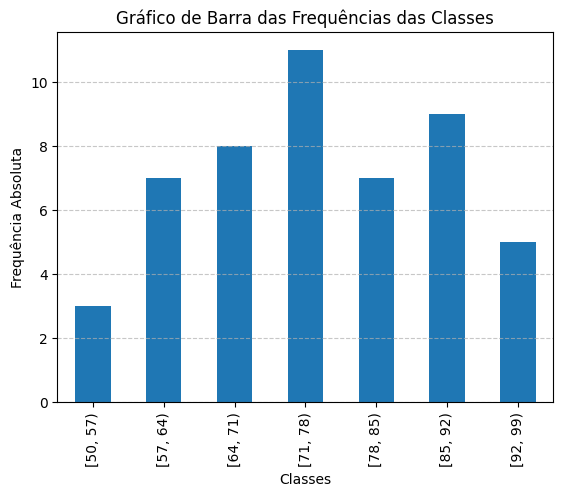

In [70]:
# Criar um gráfico de barra das frequências das classes
tabela_frequencias['Frequência Absoluta'].plot(kind='bar')
plt.xlabel('Classes')
plt.ylabel('Frequência Absoluta')
plt.title('Gráfico de Barra das Frequências das Classes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Média Ponderada x̄ = (Σ(xi * fi)) / Σfi


In [64]:
# calcula média ponderada seguindo a formula.
soma_produtos = sum(ponto_medio * freq for ponto_medio, freq in zip(pontos_medios, frequencia_classes))
total_frequencia_absoluta = sum(frequencia_classes)
media_ponderada = soma_produtos / total_frequencia_absoluta

print("A média ponderada é(aproximadamente):", media_ponderada)

A média ponderada é(aproximadamente): 75.76



Fórmula para calcular a mediana  
md = imd + ((n/2 - Fant) / find) * h

In [ ]:
# sos

 fórmula para calcular a moda

 mo = imo + (fpost - fant) / ((fpost - fant) + (fpost - fant)) * h

 -------------------------------------

 Moda (de King) = L + (h * ((F - F1) / (F - F1 + F2)))



In [ ]:
# sos

In [50]:
# Utilizando biblioteca para calcular média, moda e mediana

media = df['Pesos'].mean()
print("Média: {:.2f}".format(media))


moda = df['Pesos'].mode().values[0]
print("Moda: {:.2f}".format(moda))


mediana = df['Pesos'].median()
print("Mediana: {:.2f}".format(mediana))


Média: 75.36
Moda: 77.00
Mediana: 75.00
